<a href="https://colab.research.google.com/github/SongZhou-Meg/transformers/blob/main/Copy_of_LSTM_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 1s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [5]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


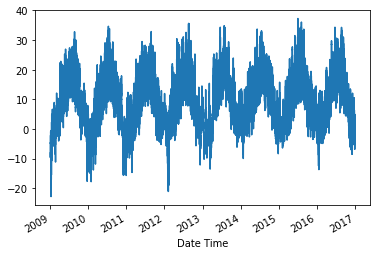

In [6]:
temp = df['T (degC)']
temp.plot()

In [7]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [8]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70086, 5, 1), (70086,))

In [9]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [11]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [12]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1873/1875 [============================>.] - ETA: 0s - loss: 53.2873 - root_mean_squared_error: 7.2998

1875/1875 [==============================] - 19s 8ms/step - loss: 53.2348 - root_mean_squared_error: 7.2962 - val_loss: 1.8968 - val_root_mean_squared_error: 1.3772
Epoch 2/10
1865/1875 [============================>.] - ETA: 0s - loss: 3.4553 - root_mean_squared_error: 1.8589

1875/1875 [==============================] - 15s 8ms/step - loss: 3.4476 - root_mean_squared_error: 1.8568 - val_loss: 0.6762 - val_root_mean_squared_error: 0.8223
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 1.1005 - root_mean_squared_error: 1.0491

1875/1875 [==============================] - 15s 8ms/step - loss: 1.1004 - root_mean_squared_error: 1.0490 - val_loss: 0.5643 - val_root_mean_squared_error: 0.7512
Epoch 4/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.7668 - root_mean_squared_error: 0.8757

1875/1875 [==============================] - 16s 8ms/step - loss: 0.7670 - root_mean_squared_error: 0.8758 - val_loss: 0.5228 - val_root_mean_squared_error: 0.7231
Epoch 5/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6905 - root_mean_squared_error: 0.8310

1875/1875 [==============================] - 16s 8ms/step - loss: 0.6904 - root_mean_squared_error: 0.8309 - val_loss: 0.5115 - val_root_mean_squared_error: 0.7152
Epoch 6/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.6670 - root_mean_squared_error: 0.8167

1875/1875 [==============================] - 15s 8ms/step - loss: 0.6666 - root_mean_squared_error: 0.8165 - val_loss: 0.5007 - val_root_mean_squared_error: 0.7076
Epoch 7/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6555 - root_mean_squared_error: 0.8096

1875/1875 [==============================] - 15s 8ms/step - loss: 0.6549 - root_mean_squared_error: 0.8093 - val_loss: 0.5000 - val_root_mean_squared_error: 0.7071
Epoch 8/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.6500 - root_mean_squared_error: 0.8063

1875/1875 [==============================] - 15s 8ms/step - loss: 0.6494 - root_mean_squared_error: 0.8058 - val_loss: 0.4985 - val_root_mean_squared_error: 0.7061
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6451 - root_mean_squared_error: 0.8032 - val_loss: 0.5032 - val_root_mean_squared_error: 0.7093
Epoch 10/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6431 - root_mean_squared_error: 0.8019

1875/1875 [==============================] - 15s 8ms/step - loss: 0.6431 - root_mean_squared_error: 0.8019 - val_loss: 0.4912 - val_root_mean_squared_error: 0.7009


In [13]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [14]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1875/1875 [==============================] - 6s 3ms/step


,Train Predictions,Actuals
0,-9.838328,-9.67
1,-9.638026,-9.17
2,-8.726928,-8.10
3,-7.262290,-7.66
4,-7.168197,-7.04
...,...,...
59995,6.204401,6.07
59996,7.294376,9.88
59997,12.109771,13.53
59998,15.929989,15.43


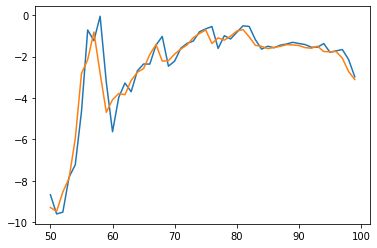

In [15]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [16]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 [==============================] - 1s 3ms/step


,Val Predictions,Actuals
0,15.464783,14.02
1,13.315845,13.67
2,13.033175,12.27
3,11.561789,11.19
4,10.427626,10.85
...,...,...
4995,17.457438,18.27
4996,17.381899,17.85
4997,17.227121,16.65
4998,15.903645,15.85


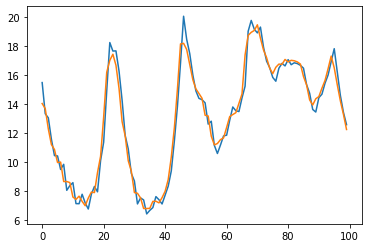

In [17]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [18]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

159/159 [==============================] - 0s 3ms/step


,Test Predictions,Actuals
0,14.436347,13.99
1,13.297487,13.46
2,12.894361,12.93
3,12.504198,12.43
4,12.054539,12.17
...,...,...
5081,-1.075575,-0.98
5082,-1.515198,-1.40
5083,-1.611813,-2.75
5084,-3.245365,-2.89


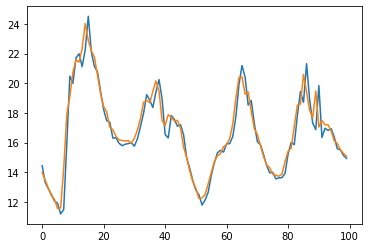

In [19]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [ ]:
# Part 2

In [21]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

159/159 [==============================] - 1s 3ms/step


(      Predictions  Actuals
 0       14.436347    13.99
 1       13.297487    13.46
 2       12.894361    12.93
 3       12.504198    12.43
 4       12.054539    12.17
 ...           ...      ...
 5081    -1.075575    -0.98
 5082    -1.515198    -1.40
 5083    -1.611813    -2.75
 5084    -3.245365    -2.89
 5085    -3.008623    -3.93
 
 [5086 rows x 2 columns], 0.6200015951372729)

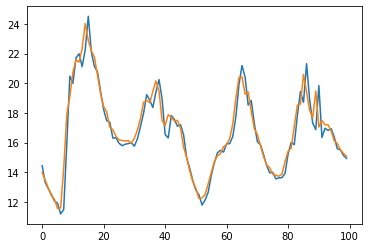

In [22]:
plot_predictions1(model1, X_test1, y_test1)

In [23]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [24]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [25]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1862/1875 [============================>.] - ETA: 0s - loss: 8.0279 - root_mean_squared_error: 2.8334

1875/1875 [==============================] - 7s 3ms/step - loss: 7.9830 - root_mean_squared_error: 2.8254 - val_loss: 1.1452 - val_root_mean_squared_error: 1.0702
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 1.1510 - root_mean_squared_error: 1.0728

1875/1875 [==============================] - 5s 3ms/step - loss: 1.1507 - root_mean_squared_error: 1.0727 - val_loss: 0.7216 - val_root_mean_squared_error: 0.8495
Epoch 3/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.8270 - root_mean_squared_error: 0.9094

1875/1875 [==============================] - 5s 3ms/step - loss: 0.8270 - root_mean_squared_error: 0.9094 - val_loss: 0.5718 - val_root_mean_squared_error: 0.7562
Epoch 4/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.7393 - root_mean_squared_error: 0.8598

1875/1875 [==============================] - 6s 3ms/step - loss: 0.7395 - root_mean_squared_error: 0.8600 - val_loss: 0.5436 - val_root_mean_squared_error: 0.7373
Epoch 5/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.7168 - root_mean_squared_error: 0.8466

1875/1875 [==============================] - 5s 3ms/step - loss: 0.7164 - root_mean_squared_error: 0.8464 - val_loss: 0.5307 - val_root_mean_squared_error: 0.7285
Epoch 6/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.7071 - root_mean_squared_error: 0.8409

1875/1875 [==============================] - 6s 3ms/step - loss: 0.7070 - root_mean_squared_error: 0.8409 - val_loss: 0.5218 - val_root_mean_squared_error: 0.7224
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6981 - root_mean_squared_error: 0.8355 - val_loss: 0.5245 - val_root_mean_squared_error: 0.7243
Epoch 8/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.6951 - root_mean_squared_error: 0.8337

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6952 - root_mean_squared_error: 0.8338 - val_loss: 0.5165 - val_root_mean_squared_error: 0.7186
Epoch 9/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6937 - root_mean_squared_error: 0.8329

1875/1875 [==============================] - 5s 3ms/step - loss: 0.6930 - root_mean_squared_error: 0.8325 - val_loss: 0.5159 - val_root_mean_squared_error: 0.7183
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6878 - root_mean_squared_error: 0.8293 - val_loss: 0.5345 - val_root_mean_squared_error: 0.7311


In [26]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [27]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [28]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 33.7461 - root_mean_squared_error: 5.8091

1875/1875 [==============================] - 18s 8ms/step - loss: 33.7300 - root_mean_squared_error: 5.8078 - val_loss: 1.1596 - val_root_mean_squared_error: 1.0769
Epoch 2/10
1869/1875 [============================>.] - ETA: 0s - loss: 2.1343 - root_mean_squared_error: 1.4609

1875/1875 [==============================] - 15s 8ms/step - loss: 2.1310 - root_mean_squared_error: 1.4598 - val_loss: 0.6184 - val_root_mean_squared_error: 0.7864
Epoch 3/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.9059 - root_mean_squared_error: 0.9518

1875/1875 [==============================] - 15s 8ms/step - loss: 0.9051 - root_mean_squared_error: 0.9514 - val_loss: 0.5318 - val_root_mean_squared_error: 0.7292
Epoch 4/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.7122 - root_mean_squared_error: 0.8439

1875/1875 [==============================] - 14s 8ms/step - loss: 0.7120 - root_mean_squared_error: 0.8438 - val_loss: 0.5224 - val_root_mean_squared_error: 0.7228
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6673 - root_mean_squared_error: 0.8169

1875/1875 [==============================] - 15s 8ms/step - loss: 0.6673 - root_mean_squared_error: 0.8169 - val_loss: 0.5035 - val_root_mean_squared_error: 0.7096
Epoch 6/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6530 - root_mean_squared_error: 0.8081

1875/1875 [==============================] - 15s 8ms/step - loss: 0.6530 - root_mean_squared_error: 0.8081 - val_loss: 0.5034 - val_root_mean_squared_error: 0.7095
Epoch 7/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6467 - root_mean_squared_error: 0.8042

1875/1875 [==============================] - 15s 8ms/step - loss: 0.6469 - root_mean_squared_error: 0.8043 - val_loss: 0.4936 - val_root_mean_squared_error: 0.7026
Epoch 8/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.6444 - root_mean_squared_error: 0.8028

1875/1875 [==============================] - 16s 8ms/step - loss: 0.6440 - root_mean_squared_error: 0.8025 - val_loss: 0.4932 - val_root_mean_squared_error: 0.7023
Epoch 9/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6421 - root_mean_squared_error: 0.8013

1875/1875 [==============================] - 15s 8ms/step - loss: 0.6420 - root_mean_squared_error: 0.8013 - val_loss: 0.4908 - val_root_mean_squared_error: 0.7006
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6401 - root_mean_squared_error: 0.8000 - val_loss: 0.4937 - val_root_mean_squared_error: 0.7027


In [29]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [30]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [31]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [32]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [33]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [34]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [35]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [36]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [37]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [38]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [39]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1870/1875 [============================>.] - ETA: 0s - loss: 36.6576 - root_mean_squared_error: 6.0545

1875/1875 [==============================] - 21s 10ms/step - loss: 36.5753 - root_mean_squared_error: 6.0477 - val_loss: 3.9089 - val_root_mean_squared_error: 1.9771
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 4.4405 - root_mean_squared_error: 2.1072

1875/1875 [==============================] - 17s 9ms/step - loss: 4.4357 - root_mean_squared_error: 2.1061 - val_loss: 1.8570 - val_root_mean_squared_error: 1.3627
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 1.8101 - root_mean_squared_error: 1.3454

1875/1875 [==============================] - 17s 9ms/step - loss: 1.8094 - root_mean_squared_error: 1.3452 - val_loss: 1.0184 - val_root_mean_squared_error: 1.0091
Epoch 4/10
1871/1875 [============================>.] - ETA: 0s - loss: 1.1208 - root_mean_squared_error: 1.0587

1875/1875 [==============================] - 18s 10ms/step - loss: 1.1199 - root_mean_squared_error: 1.0582 - val_loss: 0.8083 - val_root_mean_squared_error: 0.8991
Epoch 5/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.8735 - root_mean_squared_error: 0.9346

1875/1875 [==============================] - 18s 9ms/step - loss: 0.8738 - root_mean_squared_error: 0.9348 - val_loss: 0.6309 - val_root_mean_squared_error: 0.7943
Epoch 6/10
1875/1875 [==============================] - ETA: 0s - loss: 0.7119 - root_mean_squared_error: 0.8437

1875/1875 [==============================] - 17s 9ms/step - loss: 0.7119 - root_mean_squared_error: 0.8437 - val_loss: 0.5206 - val_root_mean_squared_error: 0.7216
Epoch 7/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6117 - root_mean_squared_error: 0.7821

1875/1875 [==============================] - 18s 10ms/step - loss: 0.6117 - root_mean_squared_error: 0.7821 - val_loss: 0.4691 - val_root_mean_squared_error: 0.6849
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5628 - root_mean_squared_error: 0.7502 - val_loss: 0.4796 - val_root_mean_squared_error: 0.6925
Epoch 9/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.5417 - root_mean_squared_error: 0.7360

1875/1875 [==============================] - 18s 9ms/step - loss: 0.5414 - root_mean_squared_error: 0.7358 - val_loss: 0.4164 - val_root_mean_squared_error: 0.6453
Epoch 10/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.5345 - root_mean_squared_error: 0.7311

1875/1875 [==============================] - 18s 9ms/step - loss: 0.5341 - root_mean_squared_error: 0.7308 - val_loss: 0.4140 - val_root_mean_squared_error: 0.6434


159/159 [==============================] - 1s 3ms/step


(      Predictions  Actuals
 0       13.249640    13.46
 1       12.856143    12.93
 2       12.459539    12.43
 3       12.181543    12.17
 4       12.311614    11.55
 ...           ...      ...
 5080    -1.054041    -0.98
 5081    -1.407528    -1.40
 5082    -1.643843    -2.75
 5083    -2.973088    -2.89
 5084    -3.060609    -3.93
 
 [5085 rows x 2 columns], 0.48155149569102806)

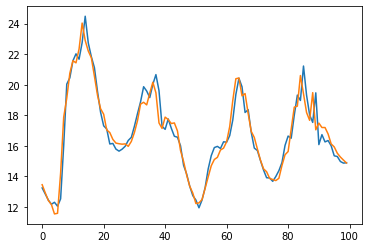

In [40]:
plot_predictions1(model4, X2_test, y2_test)

In [42]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [41]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [43]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [44]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [45]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [46]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [47]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [48]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [49]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [50]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.1417 - root_mean_squared_error: 0.3764

1875/1875 [==============================] - 22s 10ms/step - loss: 0.1413 - root_mean_squared_error: 0.3758 - val_loss: 0.0336 - val_root_mean_squared_error: 0.1833
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0253 - root_mean_squared_error: 0.1590

1875/1875 [==============================] - 18s 10ms/step - loss: 0.0253 - root_mean_squared_error: 0.1590 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1341
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1127

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 4/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.0870

1875/1875 [==============================] - 18s 10ms/step - loss: 0.0076 - root_mean_squared_error: 0.0870 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0737
Epoch 5/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0783

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0061 - root_mean_squared_error: 0.0783 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0667
Epoch 6/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0736

1875/1875 [==============================] - 18s 10ms/step - loss: 0.0054 - root_mean_squared_error: 0.0736 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0633
Epoch 7/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0716

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0051 - root_mean_squared_error: 0.0716 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0623
Epoch 8/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0708

1875/1875 [==============================] - 18s 10ms/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0621
Epoch 9/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0702

1875/1875 [==============================] - 18s 10ms/step - loss: 0.0049 - root_mean_squared_error: 0.0703 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0610
Epoch 10/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0698

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0049 - root_mean_squared_error: 0.0698 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0602


In [51]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

159/159 [==============================] - 1s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.401500,0.412451,-0.778407,-0.793439
1,0.356975,0.353683,-0.768311,-0.763123
2,0.317100,0.323123,-0.735781,-0.721893
3,0.321759,0.250251,-0.684612,-0.652773
4,0.279463,0.254952,-0.600603,-0.652773
...,...,...,...,...
95,0.686253,0.716869,-0.404348,-0.416310
96,0.647748,0.687485,-0.406253,-0.399333
97,0.632611,0.663978,-0.389781,-0.399333
98,0.638870,0.641646,-0.380733,-0.400546


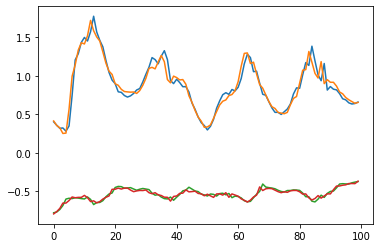

In [52]:
plot_predictions2(model5, X3_test, y3_test)

In [53]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [54]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

159/159 [==============================] - 1s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.836830,12.93,982.554016,982.43
1,12.458013,12.43,982.637268,982.68
2,12.118753,12.17,982.905518,983.02
3,12.158395,11.55,983.327454,983.59
4,11.798541,11.59,984.020264,983.59
...,...,...,...,...
95,15.259516,15.52,985.638672,985.54
96,14.931910,15.27,985.622986,985.68
97,14.803131,15.07,985.758789,985.68
98,14.856382,14.88,985.833435,985.67


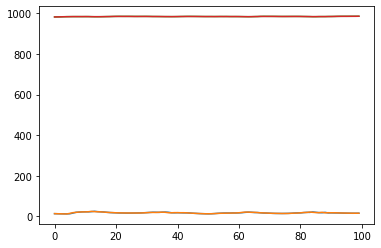

In [55]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

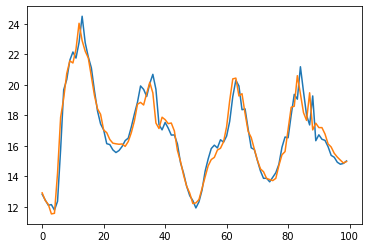

In [56]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

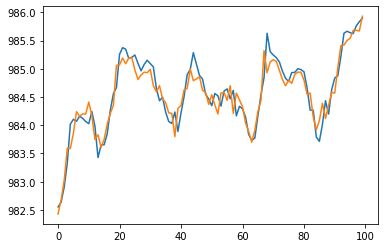

In [57]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [58]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_4 (LSTM)               (None, 64)                24832     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30,362
Trainable params: 30,362
Non-trainable params: 0
_________________________________________________________________


In [59]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [60]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.1371 - root_mean_squared_error: 0.3703

1875/1875 [==============================] - 37s 17ms/step - loss: 0.1370 - root_mean_squared_error: 0.3701 - val_loss: 0.0455 - val_root_mean_squared_error: 0.2132
Epoch 2/10
1338/1875 [====================>.........] - ETA: 5s - loss: 0.0389 - root_mean_squared_error: 0.1973

KeyboardInterrupt: ignored

In [61]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_12 (Dense)            (None, 8)                 3080      
                                                                 
 dense_13 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
_________________________________________________________________


In [62]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.2278 - root_mean_squared_error: 0.4772

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2266 - root_mean_squared_error: 0.4760 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1566
Epoch 2/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.0181 - root_mean_squared_error: 0.1345

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0181 - root_mean_squared_error: 0.1344 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1128
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.1064

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0113 - root_mean_squared_error: 0.1064 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0938
Epoch 4/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.0933

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0087 - root_mean_squared_error: 0.0933 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0841
Epoch 5/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.0869

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0075 - root_mean_squared_error: 0.0869 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0780
Epoch 6/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.0832

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0069 - root_mean_squared_error: 0.0832 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0748
Epoch 7/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0808

1875/1875 [==============================] - 7s 3ms/step - loss: 0.0065 - root_mean_squared_error: 0.0807 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0724
Epoch 8/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0790

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0062 - root_mean_squared_error: 0.0789 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0705
Epoch 9/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0776

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0060 - root_mean_squared_error: 0.0776 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0695
Epoch 10/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0766

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0059 - root_mean_squared_error: 0.0766 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0693
